In [81]:
import numpy as np

import pandas as pd
import seaborn as sb


from keras.models import Sequential # Class
from keras.layers import Dense # Class
from keras.layers import Dropout # Dropout 처리
from keras.callbacks import EarlyStopping
from keras import regularizers

from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold # K겹 교차 검증

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

%matplotlib inline

In [82]:
# 훈련용, 검증용
df = pd.read_csv('./sonar.csv', header=None)
# print(df.info())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [83]:
data = df.values
print(type(data))
print(len(data))  # 208건
X = data[:, 0:60].astype(float)  # 0 ~ 59
print(X[0:5, 0:4])
Y_obj = data[:, 60]  # 1차원 배열
print(Y_obj[0:5])

<class 'numpy.ndarray'>
208
[[0.02   0.0371 0.0428 0.0207]
 [0.0453 0.0523 0.0843 0.0689]
 [0.0262 0.0582 0.1099 0.1083]
 [0.01   0.0171 0.0623 0.0205]
 [0.0762 0.0666 0.0481 0.0394]]
['R' 'R' 'R' 'R' 'R']


In [84]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder() # 문자열을 숫자로 그룹화해서 변경, 문자코드 순서 적용
e.fit(Y_obj)   # R, M 
Y = e.transform(Y_obj)  # 0, 1, 2 정수로 변환 (알파벳 순으로 숫자부여)
print(Y)
print(len(Y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
208


In [85]:
seed = 0
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)
# print(y_val)
# print(y_val.shape)
n_fold = 5

# shuffle = False index 섞는 경우 , shuffle = True index 섞지 않는 경우
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [86]:
for train, val in skf.split(X,Y): # 훈련 데이터 20개(index)
    print(train[0:20])

[ 0  2  3  4  8 10 11 13 14 16 19 20 21 22 23 24 25 26 27 28]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
[ 0  1  2  3  4  5  6  7  9 10 11 12 14 15 16 17 18 19 20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 20 21 22]
[ 1  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 22 24 25 26]


In [87]:
for train, val in skf.split(X,Y): # 훈련 데이터 20개(index)
    print(val)

[  1   5   6   7   9  12  15  17  18  29  60  63  70  71  74  78  81  84
  85  92  99 104 105 107 110 113 119 121 123 140 142 148 151 157 158 171
 173 186 187 189 192 196 199]
[  4  16  22  25  28  33  37  39  44  47  49  53  68  72  75  76  82  90
  91  96  98 100 103 115 124 127 130 145 149 153 156 160 170 175 179 182
 183 188 193 202 203 207]
[  8  13  24  26  30  31  34  40  45  52  55  56  57  61  64  66  69  80
  94  97 101 102 108 112 114 120 125 128 131 132 135 137 138 139 147 150
 152 159 163 165 198]
[ 11  14  19  27  32  36  38  41  50  51  54  65  79  83  86  87  88  89
  95 111 116 117 122 126 129 134 146 154 166 168 169 172 174 176 177 181
 190 191 201 205 206]
[  0   2   3  10  20  21  23  35  42  43  46  48  58  59  62  67  73  77
  93 106 109 118 133 136 141 143 144 155 161 162 164 167 178 180 184 185
 194 195 197 200 204]


In [96]:
for train, val in skf.split(X,Y): # 실제 데이터
    print(X[train[0:20]])

[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 [0.01   0.0171 0.0623 ... 0.0044 0.004  0.0117]
 ...
 [0.0151 0.032  0.0599 ... 0.0019 0.0023 0.0062]
 [0.0177 0.03   0.0288 ... 0.0057 0.0032 0.0019]
 [0.01   0.0275 0.019  ... 0.002  0.0091 0.0058]]
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0126 0.0149 0.0641 ... 0.0094 0.0116 0.0063]
 [0.0473 0.0509 0.0819 ... 0.0082 0.0028 0.0027]
 [0.0664 0.0575 0.0842 ... 0.0162 0.0109 0.0079]]
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0126 0.0149 0.0641 ... 0.0094 0.0116 0.0063]
 [0.0473 0.0509 0.0819 ... 0.0082 0.0028 0.0027]
 [0.0664 0.0575 0.0842 ... 0.0162 0.0109 0.0079]]
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [

In [97]:
acc = [] # 5번 검증 정확도 저장
count = 0  # 학습횟수

for train, val in skf.split(X, Y):

    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dropout(0.25)) # 25 %의 노드를 사용하지 않음.
    model.add(Dense(1, activation='sigmoid')) # 광물 종류는 2가지

    early_stopping = EarlyStopping(monitor='loss', patience=5)
    model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])
    
    hist = model.fit(X[train], Y[train], validation_data=(X[val], Y[val]),  epochs=120, 
                     batch_size=5, callbacks=[early_stopping])
    
    test_loss, test_acc = model.evaluate(X[val], Y[val], batch_size=2)
    print('손실값:', test_loss, '/정확도:', (test_acc*100), '%') 
    acc.append(test_acc) # 순환 횟수만큼 정확도 누적
    count = count + 1
    print('▶ ', count, ' 회 학습됨')

Train on 165 samples, validate on 43 samples
Epoch 1/120
165/165 [==============================] - 1s 7ms/step - loss: 0.6830 - acc: 0.5697 - val_loss: 0.6704 - val_acc: 0.5814
Epoch 2/120
165/165 [==============================] - 0s 382us/step - loss: 0.6605 - acc: 0.5697 - val_loss: 0.6545 - val_acc: 0.5814
Epoch 3/120
165/165 [==============================] - 0s 412us/step - loss: 0.6324 - acc: 0.6909 - val_loss: 0.6438 - val_acc: 0.6512
Epoch 4/120
165/165 [==============================] - 0s 400us/step - loss: 0.5965 - acc: 0.6848 - val_loss: 0.6301 - val_acc: 0.6279
Epoch 5/120
165/165 [==============================] - 0s 382us/step - loss: 0.5859 - acc: 0.7273 - val_loss: 0.6211 - val_acc: 0.6279
Epoch 6/120
165/165 [==============================] - 0s 430us/step - loss: 0.5660 - acc: 0.6970 - val_loss: 0.6060 - val_acc: 0.6512
Epoch 7/120
165/165 [==============================] - 0s 442us/step - loss: 0.5498 - acc: 0.7515 - val_loss: 0.5998 - val_acc: 0.6512
Epoch 8/120


Epoch 10/120
166/166 [==============================] - 0s 355us/step - loss: 0.5266 - acc: 0.7711 - val_loss: 0.5635 - val_acc: 0.7143
Epoch 11/120
166/166 [==============================] - 0s 470us/step - loss: 0.4950 - acc: 0.8012 - val_loss: 0.5279 - val_acc: 0.8333
Epoch 12/120
166/166 [==============================] - 0s 434us/step - loss: 0.4836 - acc: 0.7892 - val_loss: 0.5339 - val_acc: 0.7619
Epoch 13/120
166/166 [==============================] - 0s 398us/step - loss: 0.4760 - acc: 0.7831 - val_loss: 0.5245 - val_acc: 0.7857
Epoch 14/120
166/166 [==============================] - 0s 349us/step - loss: 0.4533 - acc: 0.8373 - val_loss: 0.5099 - val_acc: 0.8333
Epoch 15/120
166/166 [==============================] - 0s 361us/step - loss: 0.4694 - acc: 0.7771 - val_loss: 0.5454 - val_acc: 0.7143
Epoch 16/120
166/166 [==============================] - 0s 349us/step - loss: 0.4681 - acc: 0.8072 - val_loss: 0.5132 - val_acc: 0.7619
Epoch 17/120
166/166 [==========================

Epoch 19/120
167/167 [==============================] - 0s 425us/step - loss: 0.4460 - acc: 0.8024 - val_loss: 0.5826 - val_acc: 0.6585
Epoch 20/120
167/167 [==============================] - 0s 347us/step - loss: 0.4027 - acc: 0.8144 - val_loss: 0.5927 - val_acc: 0.6098
Epoch 21/120
167/167 [==============================] - 0s 347us/step - loss: 0.4065 - acc: 0.7904 - val_loss: 0.5786 - val_acc: 0.6585
Epoch 22/120
167/167 [==============================] - 0s 353us/step - loss: 0.3873 - acc: 0.8263 - val_loss: 0.5653 - val_acc: 0.6585
Epoch 23/120
167/167 [==============================] - 0s 389us/step - loss: 0.3893 - acc: 0.8383 - val_loss: 0.5595 - val_acc: 0.6585
Epoch 24/120
167/167 [==============================] - 0s 371us/step - loss: 0.3780 - acc: 0.8503 - val_loss: 0.5658 - val_acc: 0.6585
Epoch 25/120
167/167 [==============================] - 0s 383us/step - loss: 0.3802 - acc: 0.8144 - val_loss: 0.6051 - val_acc: 0.6829
Epoch 26/120
167/167 [==========================

167/167 [==============================] - 0s 353us/step - loss: 0.3630 - acc: 0.8443 - val_loss: 0.3799 - val_acc: 0.8780
Epoch 40/120
167/167 [==============================] - 0s 353us/step - loss: 0.3715 - acc: 0.8383 - val_loss: 0.3855 - val_acc: 0.8780
Epoch 41/120
167/167 [==============================] - 0s 353us/step - loss: 0.3631 - acc: 0.8683 - val_loss: 0.3930 - val_acc: 0.8780
Epoch 42/120
167/167 [==============================] - 0s 353us/step - loss: 0.3556 - acc: 0.8563 - val_loss: 0.3649 - val_acc: 0.8780
Epoch 43/120
167/167 [==============================] - 0s 347us/step - loss: 0.3731 - acc: 0.8563 - val_loss: 0.3674 - val_acc: 0.8780
Epoch 44/120
167/167 [==============================] - 0s 353us/step - loss: 0.3593 - acc: 0.8563 - val_loss: 0.3914 - val_acc: 0.8780
Epoch 45/120
167/167 [==============================] - 0s 353us/step - loss: 0.3471 - acc: 0.8563 - val_loss: 0.3881 - val_acc: 0.8780
Epoch 46/120
167/167 [==============================] - 0s 35

167/167 [==============================] - 0s 419us/step - loss: 0.3320 - acc: 0.8323 - val_loss: 0.4314 - val_acc: 0.7561
Epoch 48/120
167/167 [==============================] - 0s 407us/step - loss: 0.3510 - acc: 0.8204 - val_loss: 0.4716 - val_acc: 0.8049
Epoch 49/120
41/41 [==============================] - 0s 585us/step
손실값: 0.45815888083562617 /정확도: 78.04878048780488 %
▶  5  회 학습됨


## 마지막에 학습된 데이터를 기준으로 학습결과 출력

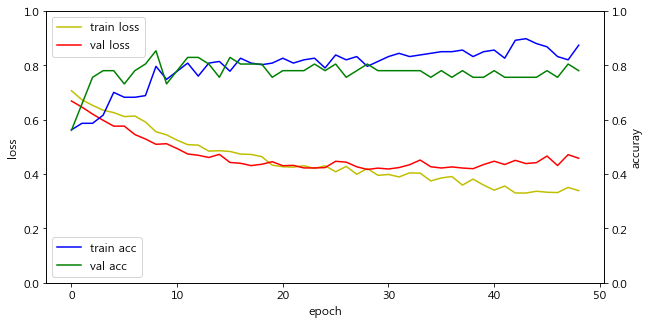

In [98]:

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

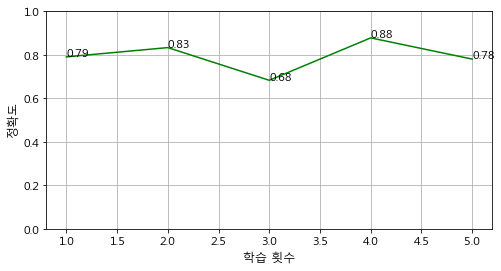

In [99]:

x = [1, 2, 3, 4, 5]

plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (8, 4) # 10:4의 그래프 비율, subplot 사용시 적용
# plt.figure(figsize=(20, 5))            # subplot 사용시 정상작동안함.
fig = plt.figure()
ax = fig.add_subplot(111) #  fig.add_subplot(1, 1, 1) # 1행 1열 첫번째 plot

plt.plot(x, acc, c='g')
plt.ylim(0, 1)
plt.xlabel('학습 횟수')
plt.ylabel('정확도')

# zip([1, 2, 3, 4, 5], [0.8372093  0.83333333 0.75609756 0.87804878 0.80487805])
# (1, 0.8372093), (2, 0.83333333)...
for xy in zip(x, acc):
    # print(type(xy))  # <class 'tuple'>
    # 출력 문자열, 기준 xy 지점, xytext: 문자열 출력 위치
    ax.annotate('%.2f' % xy[1], xy=xy, xytext=xy)  
plt.grid(True)
plt.show()

In [100]:
test_loss, test_acc = model.evaluate(x_val,y_val, batch_size=2)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

42/42 [==============================] - 0s 881us/step
손실값 :  0.3056392174746309  / 정확도 :  90.47619047619048 %
